**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
fdiry = file.path(FD_RES, "source", "RNAseq")
fname = "K562.ENCSR615EEK.ENCFF421TJX.RNAseq.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_rnaseq_import = dat
print(dim(dat))
head(dat)

Rows: 59526 Columns: 17
── Column specification ──────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): gene_id, transcript_id(s)
dbl (15): length, effective_length, expected_count, TPM, FPKM, posterior_mea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 59526    17


gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10904,10904,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12954,12954,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12956,12956,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12958,12958,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12960,12960,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12962,12962,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Explore

In [3]:
dat = dat_rnaseq_import
summary(dat$TPM)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      0.00      0.00     16.80      0.54 152445.71 

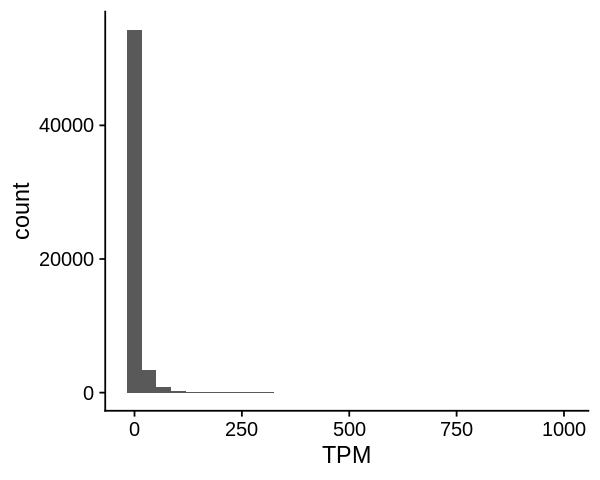

In [5]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM <= 1000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

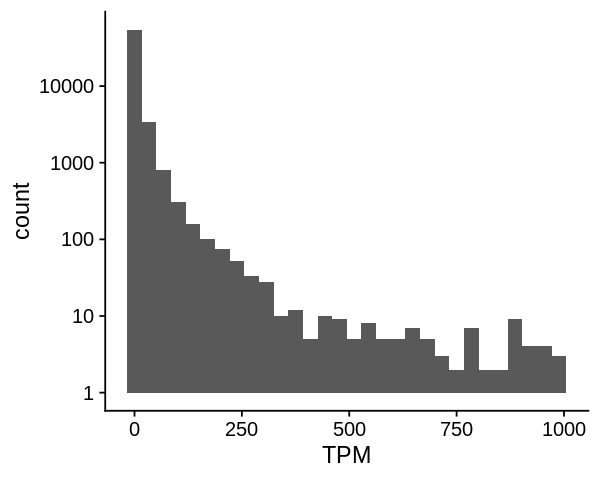

In [7]:
dat = dat_rnaseq_import
dat = dat %>% dplyr::filter(TPM <= 1000)
gpt = ggplot(dat, aes(x=TPM)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

## Number of genes with TMP > 1

In [8]:
dat = dat_rnaseq_import
print(nrow(dat))

dat = dat %>% dplyr::filter(TPM >= 1)
print(nrow(dat))

dat = dat %>% dplyr::filter(TPM > 1)
print(nrow(dat))

head(dat, 10)

[1] 59526
[1] 13216
[1] 13184


gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13023,13023,108.00,9.00,23.00,55.58,64.86,23.00,0.00,56.47,67.34,34.99440,79.33560,0.1380540,41.90990,94.81970,0.1379530
13024,13024,107.00,8.00,6.00,16.31,19.04,6.00,0.00,18.53,22.09,5.89931,32.20290,0.2535770,7.23320,38.60990,0.2535860
30958,30958,105.00,6.00,13.00,47.12,54.99,13.00,0.00,49.41,58.92,24.96290,75.28350,0.1783180,29.71930,89.74950,0.1783670
30964,30964,106.00,7.00,14.00,43.50,50.76,14.00,0.00,45.38,54.11,23.41590,68.09510,0.1731540,27.97180,81.24840,0.1732670
ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST00000371588.9,ENST00000413082.1,ENST00000466152.5,ENST00000494752.1",1088.79,989.79,1445.00,31.75,37.06,1445.00,0.00,31.32,37.34,29.67840,32.99560,0.0182175,35.41910,39.37170,0.0181676
ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000367772.8,ENST00000423670.1,ENST00000470238.1",3247.36,3148.36,518.00,3.58,4.18,518.00,0.00,3.57,4.26,3.19350,3.95176,0.0364012,3.79899,4.70376,0.0363830
ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000413811.3,ENST00000459772.5,ENST00000466580.6,ENST00000472795.5,ENST00000481744.5,ENST00000496973.5,ENST00000498289.5",2223.30,2124.30,1588.00,16.26,18.97,1588.00,0.00,16.00,19.08,14.75070,17.29650,0.0272134,17.59450,20.63060,0.0271990
ENSG00000000971.15,"ENST00000359637.2,ENST00000367429.8,ENST00000466229.5,ENST00000470918.1,ENST00000496761.1,ENST00000630130.2",2589.40,2490.40,2169.84,18.95,22.11,2168.89,1.76,18.82,22.44,17.56640,20.10980,0.0232081,20.95850,23.99040,0.0231992
ENSG00000001036.13,"ENST00000002165.10,ENST00000367585.1,ENST00000451668.1",1827.22,1728.22,3814.00,48.00,56.02,3814.00,0.00,46.83,55.84,44.45230,49.27350,0.0177586,53.04400,58.79600,0.0177460


## Gene ID

In [9]:
###
dat = dat_rnaseq_import
dat = dat %>% 
    dplyr::filter(str_detect(gene_id, "ENS")) %>% 
    tidyr::separate(gene_id, c("gene_id_stable", "gene_id_version"), sep="\\.", remove = FALSE)

### assign and show
dat_rnaseq_arrange = dat
print(nrow(dat))
head(dat)

[1] 58780


gene_id,gene_id_stable,gene_id_version,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.14,ENSG00000000003,14,"ENST00000373020.8,ENST00000494424.1,ENST00000496771.5,ENST00000612152.4,ENST00000614008.4",1301.17,1202.17,3,0.05,0.06,3,0,0.15,0.18,0.0483404,0.267674,0.2698290,0.0576847,0.319259,0.2697760
ENSG00000000005.5,ENSG00000000005,5,"ENST00000373031.4,ENST00000485971.1",1339.00,1240.00,2,0.04,0.04,2,0,0.10,0.12,0.0131108,0.206532,0.3675880,0.0156234,0.246304,0.3673940
ENSG00000000419.12,ENSG00000000419,12,"ENST00000371582.8,ENST00000371584.8,ENST00000371588.9,ENST00000413082.1,ENST00000466152.5,ENST00000494752.1",1088.79,989.79,1445,31.75,37.06,1445,0,31.32,37.34,29.6784000,32.995600,0.0182175,35.4191000,39.371700,0.0181676
ENSG00000000457.13,ENSG00000000457,13,"ENST00000367770.5,ENST00000367771.10,ENST00000367772.8,ENST00000423670.1,ENST00000470238.1",3247.36,3148.36,518,3.58,4.18,518,0,3.57,4.26,3.1935000,3.951760,0.0364012,3.7989900,4.703760,0.0363830
ENSG00000000460.16,ENSG00000000460,16,"ENST00000286031.10,ENST00000359326.8,ENST00000413811.3,ENST00000459772.5,ENST00000466580.6,ENST00000472795.5,ENST00000481744.5,ENST00000496973.5,ENST00000498289.5",2223.30,2124.30,1588,16.26,18.97,1588,0,16.00,19.08,14.7507000,17.296500,0.0272134,17.5945000,20.630600,0.0271990
ENSG00000000938.12,ENSG00000000938,12,"ENST00000374003.7,ENST00000374004.5,ENST00000374005.7,ENST00000399173.5,ENST00000457296.5,ENST00000468038.1,ENST00000475472.5",1891.31,1792.31,4,0.05,0.06,4,0,0.18,0.21,0.0670923,0.309123,0.2395950,0.0800365,0.368688,0.2396440
